<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9B%D0%B0%D0%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SciPy

# Задание 1
 Напишите программу для численного вычисления определённого интеграла с помощью средств SciPy. Сравните результаты вычисления различными функциями интегрирования с точным решением.

 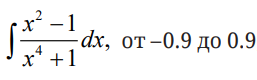

*Аналитический способ*
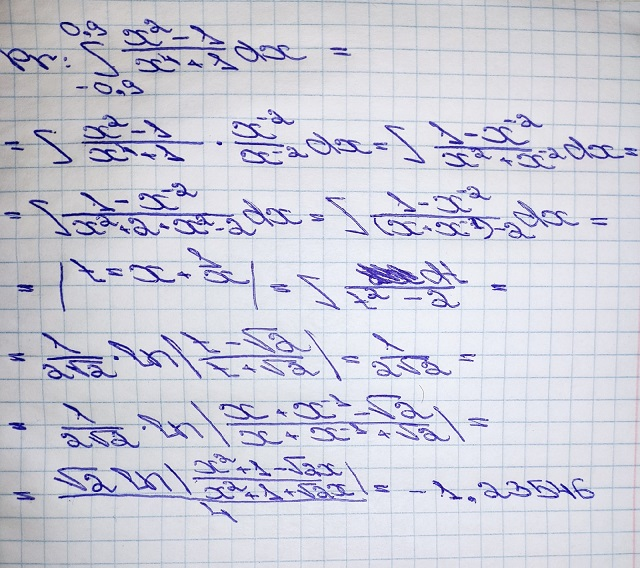

In [19]:
import math
import numpy as np
import sympy as sy
from scipy import *
from scipy import integrate
from scipy.integrate import *
from numpy.lib.scimath import *
from scipy.integrate import simps

In [20]:
res1 = log(abs((0.9**2+1-sqrt(2)*0.9)/(0.9**2+1+sqrt(2)*0.9)))
res2 = log(abs((0.9**2+1-sqrt(2)*(-0.9))/(0.9**2+1+sqrt(2)*(-0.9))))
a = sqrt(2)/4
total = a*res1 - a*res2
print(round(total,10))

-1.2354612481


*Первый способ*

In [21]:
def g(x):
     return (x**2 - 1)/(x**4 + 1)
integrate.quad(g, -0.9, 0.9)

*Второй способ*

In [22]:
sy.init_printing()

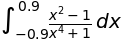

In [23]:
x= sy.symbols('x')
f = (x**2 - 1)/(x**4 + 1)
sy.Integral(f, (x, -0.9, 0.9))

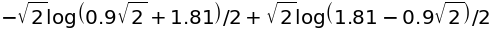

In [24]:
sy.integrate(f, (x, -0.9, 0.9))

*Третий способ*

In [25]:
def f1(x):
    return (x**2 - 1)/(x**4 + 1)

x = np.arange(-0.9, 0.9, 0.00001)

y1 = f1(x)
I1 = simps(y1, x)
print(I1)

-1.2354601007751747


# Задание 2
Напишите программу для численного решения обыкновенного дифференциального уравнения с заданным начальным условием с помощью средств SciPy. Сравните результат вычисления
с точным решением. Нарисуйте графики точного и численного решений, а также относительной ошибки численного решения.

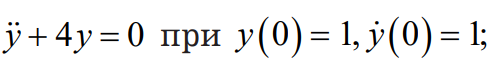

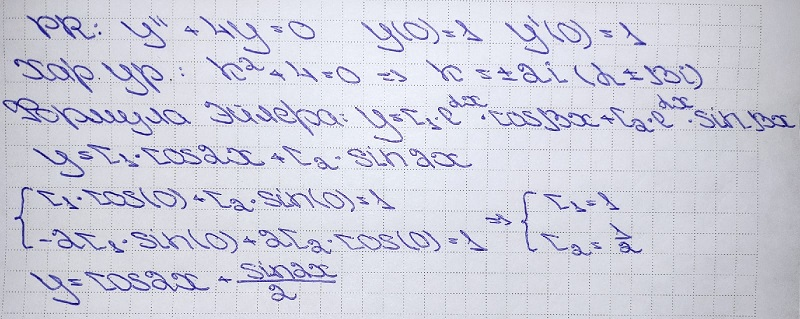

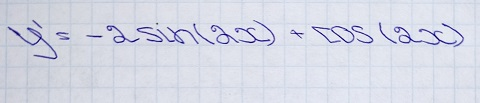

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [27]:
def F(s, t, b, c):
    dudt = s[1]
    dvdt = -b*s[1] - c*s[0]
    return [dudt, dvdt]

In [28]:
b = 0
c = 4
y0 = [1, 1]
t = np.linspace(-10, 10, 1000)
sol = odeint(F, y0, t, args=(b, c))
y1 = sol[:,0]
y2 = sol[:,1]

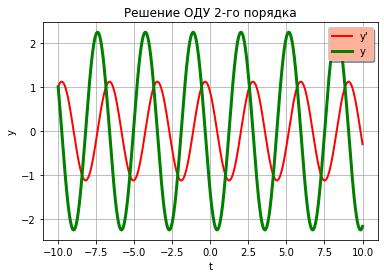

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set(title='Решение ОДУ 2-го порядка')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.plot(t, y1, color = 'r', linewidth = 2)
ax.plot(t, y2, color = 'g', linewidth = 3)
lgnd = ax.legend(["y'", "y"], loc='upper right', shadow = True)
lgnd.get_frame().set_facecolor('#ffb19a')
plt.grid()
plt.show()

# Помощь в решение

PR 1

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [31]:
def dydt(y, t):
    return -y*t

In [32]:
t = np.linspace(-2, 2, 100)
y0 = 1
y = odeint(dydt, y0, t)
y = np.array(y).flatten()

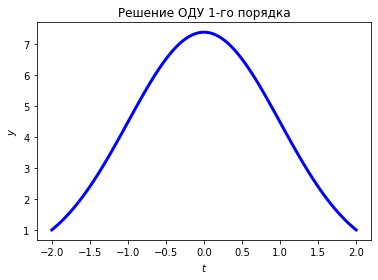

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set(title='Решение ОДУ 1-го порядка')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.plot(t,y, color = 'blue', linewidth = 3)
plt.show()

PR 2 

In [34]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [35]:
def f(y, t):
    y1, y2 = y
    return [y2, - y2 - y1]

In [36]:
t = np.linspace(0, 10, 50)
y0 = [0, 1]
w = odeint(f, y0, t)
y1 = w[:,0]
y2 = w[:,1]

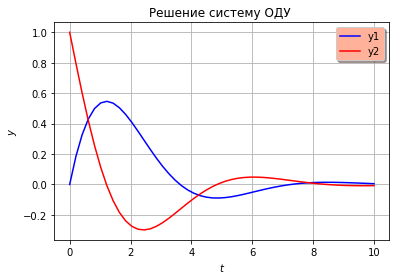

In [37]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.set(title='Решение систему ОДУ ')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.plot(t, y1, color = 'blue')
ax.plot(t, y2, color = 'red')
lgnd = ax.legend(['y1', 'y2'], loc='upper right', shadow = True)
lgnd.get_frame().set_facecolor('#ffb19a')
plt.grid(True)
plt.show()